# Homework Assignment 8

In [1]:
!pip install turicreate
!pip install spaCy
!pip install pymongo
!pip install geopandas
!pip install descartes
!pip install geopy
!pip install folium
!pip install imageio

# Run this to make cartopy work with colab 
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install --no-binary shapely shapely --force


     |████████████████████████████████| 92.0 MB 15 kB/s 
     |████████████████████████████████| 3.5 MB 18.5 MB/s 
     |████████████████████████████████| 322 kB 31.7 MB/s 
     |████████████████████████████████| 3.6 MB 22.1 MB/s 
     |████████████████████████████████| 86.4 MB 69 kB/s 
     |████████████████████████████████| 18.3 MB 477 kB/s 
     |████████████████████████████████| 2.9 MB 25.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 3.8 MB 30.9 MB/s 
     |████████████████████████████████| 449 kB 65.3 MB/s 
     |████████████████████████████████| 50 kB 4.9 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=dbab157c867ef4f0e6a50442f6a4740a6adfe1576918231a2f9d2d1b91e259df
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=1280273e1ff

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 34.9 MB/s 
     |████████████████████████████████| 6.3 MB 47.5 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (103 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [1]:
import numpy as np
import pandas as pd
import nltk
import urllib.request
import re
import pandas as pd
import turicreate as tc
import spacy
from tqdm import tqdm
from collections import defaultdict

**Question 1:** Select a book or a movie's subtitle, and find the locations that appear in the book/movie. Then, draw these locations on a map (at least 10 locations) (30pt). Connect the discovered locations with lines according to their order of appearance
in the book. For example, if location B appeared immediately after location A, then draw a line connecting locations A and B (20pt).

# THE FEDERALIST PAPERS

## By Alexander Hamilton, John Jay, and James Madison

In [2]:
url = "https://www.gutenberg.org/cache/epub/1404/pg1404.txt"
file = urllib.request.urlopen(url)
lines=[]
for line in file:
  decoded_line = re.sub("  "," ",re.sub('[,.!?;]',"",line.decode("utf-8").strip("\r\n"))).replace("'", '').replace('"', '').replace('”', '').replace('“', '')
  lines.append(decoded_line)
print(lines[20:])

['', '', '', '', 'Produced by The Constitution Society and Anonymous Volunteers', '', '', '', '', '', 'THE FEDERALIST PAPERS', '', 'By Alexander Hamilton John Jay and James Madison', '', '', '', '', 'FEDERALIST No 1', '', 'General Introduction', '', 'For the Independent Journal Saturday October 27 1787', '', '', 'HAMILTON', '', 'To the People of the State of New York:', '', 'AFTER an unequivocal experience of the inefficacy of the subsisting', 'federal government you are called upon to deliberate on a new', 'Constitution for the United States of America The subject speaks its', 'own importance comprehending in its consequences nothing less than the', 'existence of the UNION the safety and welfare of the parts of which it', 'is composed the fate of an empire in many respects the most interesting', 'in the world It has been frequently remarked that it seems to have been', 'reserved to the people of this country by their conduct and example', 'to decide the important question whether soci

In [3]:
book=[l for l in lines[46:] if l]
book[:10]

['To the People of the State of New York:',
 'AFTER an unequivocal experience of the inefficacy of the subsisting',
 'federal government you are called upon to deliberate on a new',
 'Constitution for the United States of America The subject speaks its',
 'own importance comprehending in its consequences nothing less than the',
 'existence of the UNION the safety and welfare of the parts of which it',
 'is composed the fate of an empire in many respects the most interesting',
 'in the world It has been frequently remarked that it seems to have been',
 'reserved to the people of this country by their conduct and example',
 'to decide the important question whether societies of men are really']

In [4]:
d=pd.DataFrame(book, columns=["text"])
sf=tc.SFrame(d)
sf

Columns:
	text	str

Rows: 17599

Data:
+-------------------------------+
|              text             |
+-------------------------------+
| To the People of the State... |
| AFTER an unequivocal exper... |
| federal government you are... |
| Constitution for the Unite... |
| own importance comprehendi... |
| existence of the UNION the... |
| is composed the fate of an... |
| in the world It has been f... |
| reserved to the people of ... |
| to decide the important qu... |
+-------------------------------+
[17599 rows x 1 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [5]:
nlp = spacy.load('en_core_web_lg')
def get_entites_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        if  label not in entities_dict:
            entities_dict[label] = set()
        entities_dict[label].add(entity.text)        
    return entities_dict


In [6]:
places_list=[]
l=[]
for i in tqdm(range(len(sf["text"]))):
    t = sf[i]['text']
    et=get_entites_from_text(t)
    if et:
      l.append(et)
      if "GPE" in et.keys():
         places_list.append(et["GPE"])


100%|██████████| 17599/17599 [03:09<00:00, 93.03it/s]


In [14]:
bad_places=["united","states","providence", "america", "legislature", "us"]

In [15]:
places_l=[[a for a in list(places_list[i]) if not any(word in a.lower() for word in bad_places)] for i in range(len(places_list))]

In [16]:
flat_places_list = [item for sublist in places_l for item in sublist if item ]
print(len(flat_places_list))
flat_places_list[:10]


538


['Philadelphia',
 'Britain',
 'Spain',
 'Portugal',
 'Britain',
 'Genoa',
 'FRANCE',
 'Spain',
 'Britain',
 'Britain']

In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Data Science Education App") #  Using OpenStreetMap Nominatim


In [22]:
!pip install geopy

In [18]:
from functools import lru_cache
from scipy.interpolate import interp1d # for transfaering font size
import time

@lru_cache(maxsize=256)
def get_location(loc):
    time.sleep(1)
    return geolocator.geocode(loc)

In [19]:
sf=tc.SFrame(pd.DataFrame(flat_places_list , columns=["place"]))
sf

Columns:
	place	str

Rows: 538

Data:
+--------------+
|    place     |
+--------------+
| Philadelphia |
|   Britain    |
|    Spain     |
|   Portugal   |
|   Britain    |
|    Genoa     |
|    FRANCE    |
|    Spain     |
|   Britain    |
|   Britain    |
+--------------+
[538 rows x 1 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [48]:
#delete duplicates
sf_small=[sf[0]["place"]]
last=sf[0]["place"]

In [49]:
for i in range(1,len(sf)):
  c=sf[i]["place"]
  if c!=last:
    sf_small.append(c)
    last=c

In [51]:
sf_small=tc.SFrame(pd.DataFrame(sf_small, columns=["place"]))

In [56]:
loc=[]

In [59]:
for i in tqdm(range(len(sf_small))):
  try:
    c=get_location(sf_small[i]["place"])
    loc.append(c)
  except:
    print(sf_small[i]["place"])


 45%|████▌     | 222/489 [00:36<00:59,  4.48it/s]

this State of New York


 52%|█████▏    | 255/489 [00:46<00:56,  4.12it/s]

the State of South Carolina


100%|██████████| 489/489 [01:21<00:00,  5.98it/s]


In [62]:
loc[0].longitude

-75.1635262

In [65]:
import folium
import matplotlib.pyplot as plt


In [79]:
m=folium.Map(location=[40.712776, -74.005974])


In [80]:
last=loc[0]
for i in range(len(loc)):
  try:
    folium.PolyLine([(last.latitude,last.longitude),(loc[i+1].latitude,loc[i+1].longitude)]).add_to(m)
    last=loc[i+1]
  except:
    continue

In [81]:
m

**Question 2:** Select a country's' statistic from the [World Development Indicators dataset](https://www.kaggle.com/worldbank/world-development-indicators) (Please notice there are several files in the dataset, such as _Indicators.csv_).
Then, create a choropleth map displaying how the selected statistics changed over time (15pt) 
    
**Bonus:** Create a short animation that displays how the chosen statistics changed over time (15pt)

In [88]:
import json
import os

!mkdir /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [90]:
# Installing the Kaggle package
import json
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amirbialer","key":"f2af62d43f0aaf0ee3bea5998634a1b7"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [92]:
!mkdir ./datasets
!mkdir ./datasets/country

!kaggle datasets download -d kaggle kaggle/world-development-indicators -p ./datasets/country
!unzip ./datasets/country/*.zip  -d ./datasets/country/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/country’: File exists
world-development-indicators.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/country/world-development-indicators.zip
  inflating: ./datasets/country/Country.csv  
  inflating: ./datasets/country/CountryNotes.csv  
  inflating: ./datasets/country/Footnotes.csv  
  inflating: ./datasets/country/Indicators.csv  
  inflating: ./datasets/country/Series.csv  
  inflating: ./datasets/country/SeriesNotes.csv  
  inflating: ./datasets/country/database.sqlite  
  inflating: ./datasets/country/hashes.txt  


In [118]:
ind=tc.SFrame.read_csv("/content/datasets/country/Indicators.csv")

Finished parsing file /content/datasets/country/Indicators.csv

Parsing completed. Parsed 100 lines in 2.36026 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 528165 lines. Lines per second: 248249

Read 3128826 lines. Lines per second: 410911

Finished parsing file /content/datasets/country/Indicators.csv

Parsing completed. Parsed 5656458 lines in 12.4379 secs.

In [132]:
ind["CountryName"]=ind["CountryName"].astype(str)
ind["IndicatorName"]=ind["IndicatorName"].astype(str)
ind["CountryName"]=ind["CountryName"].apply(lambda x: x if x else "")
ind["IndicatorName"]=ind["IndicatorName"].apply(lambda x: x if x else "")

In [133]:
x=ind[ind["IndicatorName"]=='Unemployment, total (% of total labor force) (national estimate)']
x.materialize()
x

Columns:
	CountryName	str
	CountryCode	str
	IndicatorName	str
	IndicatorCode	str
	Year	int
	Value	float

Rows: 3642

Data:
+----------------+-------------+-------------------------------+
|  CountryName   | CountryCode |         IndicatorName         |
+----------------+-------------+-------------------------------+
| American Samoa |     ASM     | Unemployment, total (% of ... |
|   Argentina    |     ARG     | Unemployment, total (% of ... |
|   Australia    |     AUS     | Unemployment, total (% of ... |
|    Barbados    |     BRB     | Unemployment, total (% of ... |
|    Bolivia     |     BOL     | Unemployment, total (% of ... |
|     Canada     |     CAN     | Unemployment, total (% of ... |
|     Chile      |     CHL     | Unemployment, total (% of ... |
|     China      |     CHN     | Unemployment, total (% of ... |
|    Colombia    |     COL     | Unemployment, total (% of ... |
|   Costa Rica   |     CRI     | Unemployment, total (% of ... |
+----------------+-------------+-------------------------------+
+-------------------+------+--------------------+
|   IndicatorCode   | Year |       Value        |
+-------------------+------+--------------------+
| SL.UEM.TOTL.NE.ZS | 1980 |  12.3999996185303  |
| SL.UEM.TOTL.NE.ZS | 1980 | 2.2999999523162797 |
| SL.UEM.TOTL.NE.ZS | 1980 | 6.099999904632571  |
| SL.UEM.TOTL.NE.ZS | 1980 |  11.3999996185303  |
| SL.UEM.TOTL.NE.ZS | 1980 | 5.800000190734861  |
| SL.UEM.TOTL.NE.ZS | 1980 |        7.5         |
| SL.UEM.TOTL.NE.ZS | 1980 |  10.3999996185303  |
| SL.UEM.TOTL.NE.ZS | 1980 |  4.90000009536743  |
| SL.UEM.TOTL.NE.ZS | 1980 |  9.10000038146973  |
| SL.UEM.TOTL.NE.ZS | 1980 | 5.900000095367429  |
+-------------------+------+--------------------+
[3642 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [169]:
df=x.to_dataframe()
s=df.groupby(by="CountryCode")["Value"].std().reset_index()
s=s.fillna(0)

In [170]:
s

CountryCode     Value
0           ABW  1.609348
1           AFG  0.212132
2           ALB  3.102016
3           ARB  1.796538
4           ARE  1.269796
..          ...       ...
215         YEM  2.874891
216         ZAF  2.436831
217         ZAR  0.000000
218         ZMB  3.990391
219         ZWE  2.795582

[220 rows x 2 columns]

In [171]:
bad_places=["European Union",'Upper middle income','Lower middle income', 'Central Europe and the Baltics','Middle income', 'Northern Mariana Islands', 'Europe & Central Asia (all income levels)', 'East Asia & Pacific (developing only)', 'Macao SAR, China', 'OECD members','High income: nonOECD', 'American Samoa','Low & middle income','Arab World','Europe & Central Asia (developing only)','North America','High income: OECD','South Asia','World','East Asia & Pacific (all income levels)','High income','Euro area']

In [172]:
s["valid_places"]=s["CountryCode"].apply(lambda x: 1 if x not in bad_places else 0)

In [174]:
val=s[s["valid_places"]==1]
val

CountryCode     Value  valid_places
0           ABW  1.609348             1
1           AFG  0.212132             1
2           ALB  3.102016             1
3           ARB  1.796538             1
4           ARE  1.269796             1
..          ...       ...           ...
215         YEM  2.874891             1
216         ZAF  2.436831             1
217         ZAR  0.000000             1
218         ZMB  3.990391             1
219         ZWE  2.795582             1

[220 rows x 3 columns]

In [175]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [176]:
world=world.merge(val, left_on="iso_a3", right_on="CountryCode")

## Plotting unimployment std

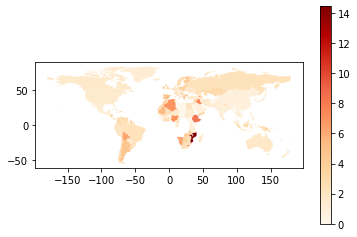

In [177]:
import math
fig, ax = plt.subplots()

ax.set_aspect('equal')

world.plot(ax=ax, column="Value",  cmap='OrRd', legend=True  )

**Question 3:** Select a request type from [San Francisco 311 dataset](https://www.kaggle.com/datasf/case-data-from-san-francisco-311).
Create an interactive map that somehow presents in which areas this request occurs the most (35pt).

In [179]:
!mkdir ./datasets/san


In [180]:

!kaggle datasets download -d datasf/case-data-from-san-francisco-311 -p ./datasets/san
!unzip ./datasets/san/*.zip  -d ./datasets/san/

 95% 116M/122M [00:01<00:00, 109MB/s]
100% 122M/122M [00:01<00:00, 117MB/s]
Archive:  ./datasets/san/case-data-from-san-francisco-311.zip
  inflating: ./datasets/san/Case_Data_from_San_Francisco_311__SF311.csv  
  inflating: ./datasets/san/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.dbf  
  inflating: ./datasets/san/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.prj  
  inflating: ./datasets/san/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shp  
  inflating: ./datasets/san/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shx  
  inflating: ./datasets/san/Shapefiles (2)/Supervisor Districts as of April 2012/geo_export_38fd3153-0303-488e-9f3c-0f81e8e00115.dbf  
  inflating: ./datasets/san/Shapefiles (2)/Supervisor Districts as of April 2012/geo_export_38fd3153-0303-488e-9f3c-0f81e8e00115.prj  
  inflating: ./datasets/san/Shapefiles

In [181]:
sf=tc.SFrame.read_csv("/content/datasets/san/Case_Data_from_San_Francisco_311__SF311.csv")

Finished parsing file /content/datasets/san/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 100 lines in 3.29404 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,int,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 189228 lines. Lines per second: 81971

Read 882333 lines. Lines per second: 121795

Unexpected characters after last column. "Abandoned Vehicle - Car4door"
Parse failed at token ending at: 
	s Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car4door,^Gray - Volkswagen -  - 7MJV079,Intersection of 2
Successfully parsed 16 tokens: 
	0: 5526685
	1: 02/02/2016 ... 5:55:47 AM
	2: 02/03/2016 ... 1:21:40 AM
	3: 02/03/2016 ... 1:21:40 AM
	4: Closed
	5: "Case Reso ... 1256715196
	6: -122.391840449142)"
	7: Voice In
	8: 5698025
	9: 03/24/2016 ... 8:34:48 PM
	10: 03/29/2016 ... 8:25:01 AM
	11: 3
	12: Closed
	13: DPT Abando ...       #229
	14: DPT Abando ... Work Queue
	15: Abandoned Vehicle

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,General Requests,
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,mech
Successfully parsed 0 tokens:

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	:00:36 AM,Closed,Case Resolved - duplicate sr,DPW Ops Queue,^Street and Sidewalk Cleaning,Illegal Encampment,
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ... and 8TH ST
	6: 10
	7: Showplace Square
	8: (37.767300 ... 428647996)
	9: Voice In
	10: 5698219
	11: 3
	12: 03/25/2016 ... 7:00:36 AM
	13: 03/25/2016 ... 7:00:36 AM
	14: Closed
	15: Case Resol ... plicate sr

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	/2016 01:00:00 AM,Closed,Case Resolved - done,DPW Ops Queue,^Street and Sidewalk Cleaning,Hazardous Materials
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ...  HOWARD ST
	6: 6
	7: South of Market
	8: (37.773100 ... 561380814)
	9: Voice In
	10: 5698609
	11: 3
	12: 03/29/2016 ... 1:00:00 AM
	13: 03/29/2016 ... 1:00:00 AM
	14: Closed
	15: Case Resolved - done

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,garb
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

16596 lines failed to parse correctly

Finished parsing file /content/datasets/san/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 1161482 lines in 10.1817 secs.

In [187]:
sf1=sf[sf["Request Type"]=="Offensive Graffiti on Public Property"]
sf1.materialize()

In [188]:
sf1

Columns:
	CaseID	int
	Opened	str
	Closed	str
	Updated	str
	Status	str
	Status Notes	str
	Responsible Agency	str
	Category	str
	Request Type	str
	Request Details	str
	Address	str
	Supervisor District	int
	Neighborhood	str
	Point	str
	Source	str
	Media URL	str

Rows: 60074

Data:
+--------+------------------------+------------------------+
| CaseID |         Opened         |         Closed         |
+--------+------------------------+------------------------+
| 322564 | 11/30/2008 10:43:00 PM | 12/01/2008 04:07:00 PM |
| 322438 | 11/30/2008 02:04:00 PM | 03/04/2009 01:10:00 PM |
| 322164 | 11/29/2008 03:59:00 PM | 07/21/2009 04:23:00 PM |
| 321760 | 11/28/2008 12:37:00 PM | 07/21/2009 04:17:00 PM |
| 321756 | 11/28/2008 12:27:00 PM | 11/30/2008 05:07:00 PM |
| 321750 | 11/28/2008 12:17:00 PM | 12/01/2008 09:06:00 AM |
| 321662 | 11/28/2008 10:06:00 AM | 01/15/2009 05:07:00 AM |
| 321660 | 11/28/2008 10:04:00 AM | 01/15/2009 05:07:00 AM |
| 321648 | 11/28/2008 09:51:00 AM | 07/21/2009 04:17:00 PM |
| 321642 | 11/28/2008 09:47:00 AM | 07/21/2009 04:17:00 PM |
+--------+------------------------+------------------------+
+------------------------+--------+--------------+--------------------+
|        Updated         | Status | Status Notes | Responsible Agency |
+------------------------+--------+--------------+--------------------+
| 12/01/2008 04:07:00 PM | Closed |              |   DPW Ops Queue    |
| 03/04/2009 01:10:00 PM | Closed |              |   DPW Ops Queue    |
| 07/21/2009 04:23:00 PM | Closed |              |   DPW Ops Queue    |
| 07/21/2009 04:17:00 PM | Closed |              |   DPW BSM Queue    |
| 11/30/2008 05:07:00 PM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 09:06:00 AM | Closed |              |   DPW Ops Queue    |
| 01/15/2009 05:07:00 AM | Closed |              |   DPW BSM Queue    |
| 01/15/2009 05:07:00 AM | Closed |              |   DPW BSM Queue    |
| 07/21/2009 04:17:00 PM | Closed |              |   DPW Ops Queue    |
| 07/21/2009 04:17:00 PM | Closed |              |   DPW Ops Queue    |
+------------------------+--------+--------------+--------------------+
+--------------------------+-------------------------------+
|         Category         |          Request Type         |
+--------------------------+-------------------------------+
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
| Graffiti Public Property | Offensive Graffiti on Publ... |
+--------------------------+-------------------------------+
+-------------------------------+-------------------------------+---------------------+
|        Request Details        |            Address            | Supervisor District |
+-------------------------------+-------------------------------+---------------------+
| Other_enter_additional_det... |    1 NOB HILL CIR, SAN FRA... |          3          |
| Other_enter_additional_det... | Intersection of FOLSOM ST ... |          6          |
|        Pole - Offensive       | Intersection of OLIVE ST a... |          6          |
|     News_rack - Offensive     | Intersection of FLOWER ST ... |          10         |
|  City_receptacle - Offensive  | Intersection of FELTON ST ... |          9          |
|        Pole - Offensive       | Intersection of BAY SHORE ... |          10         |
|     News_rack - Offensive     | Intersection of 17TH ST an... |          8          |
|     News_rack - Offensive     | Intersection of 18TH ST an... |          8          |
|      Mail_box - Offensive     | Int

In [209]:
m = folium.Map() #  Latitude and Longitude (Northing, Easting)
for i in range(1000):
  try:
    lat=float(re.findall("(?<=\()(.*)(?=\,)",sf[i]["Point"])[0])
    long=float(re.findall("(?<=\,)(.*)(?=\))",sf[i]["Point"])[0])
    folium.Marker(
    location=[lat,long], # coordinates for the marker (Earth Lab at CU Boulder)
    popup=sf1[i]['Request Details'], # pop-up label for the marker
    icon=folium.Icon()
        ).add_to(m)
  except:
    continue
m  